In [1]:
import pandas as pd
import numpy as np
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from geopy.distance import great_circle
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium 
# Matplotlib and associated plotting modules

import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import seaborn as sns

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    ------------------------------------------------------------
                       

In [3]:
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import types
import pandas as pd
import requests
# import k-means from clustering stage
from sklearn.cluster import KMeans

## DATASET FROM KAGGLE.COM
MELBOURNE HOUSING MARKET @ AUTHOR TONY PINO


Some Key Details


Suburb: Suburb
Address: Address
Rooms: Number of rooms
Price: Price in Australian dollars

In [50]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_43e7a34c34af48fb91884faa5fd849a8 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='uWhXPUjf14jpVTWk094G0wUXGBh6L8W7KPuQxcvE6_TY',
    ibm_auth_endpoint="https://iam.eu-de.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_43e7a34c34af48fb91884faa5fd849a8.get_object(Bucket='datasciencecapstone-donotdelete-pr-uiau3fme4dwrki',Key='Melbourne_housing_FULL.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data = pd.read_csv(body)
df_data.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [51]:
df_data.shape

(34857, 21)

In [52]:
df_data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [53]:
df_data= df_data[(df_data['Rooms'] >= 1.0) & (df_data['Rooms']<= 6.0)]

In [54]:
df_data= df_data[(df_data['Bedroom2'] >= 1.0) & (df_data['Bedroom2']<= 6.0)]

In [55]:
df_data= df_data[(df_data['Bathroom'] >= 1.0) & (df_data['Bathroom']<= 3.0)]

In [56]:
df_data= df_data[(df_data['Car'] >= 1.0) & (df_data['Car']<= 4.0)]

In [57]:
df_data= df_data[(df_data['Landsize'] >= 0) & (df_data['Landsize']<= 1000)]

In [58]:
df_data= df_data[(df_data['BuildingArea'] >= 0) & (df_data['BuildingArea']<= 1000)]

In [60]:
df_data.shape

(10331, 21)

In [61]:
df_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,10331.000000,8.058000e+03,10331.000000,10331.000000,10331.000000,10331.000000,10331.000000,10331.000000,10331.000000,9955.000000,10323.000000,10323.000000,10331.000000
mean,3.133869,1.057663e+06,11.352715,3114.394831,3.109283,1.652889,1.748814,430.891008,152.294338,1966.651030,-37.808167,144.996788,7483.693931
std,0.919924,6.163612e+05,6.634150,112.316283,0.917593,0.646478,0.744335,261.245268,81.327489,36.195126,0.091093,0.118168,4333.218631
min,1.000000,1.310000e+05,0.000000,3000.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1196.000000,-38.174360,144.423790,389.000000
25%,3.000000,6.350000e+05,6.900000,3046.000000,3.000000,1.000000,1.000000,214.000000,103.000000,1950.000000,-37.864180,144.925865,4407.000000
50%,3.000000,8.800000e+05,10.500000,3095.000000,3.000000,2.000000,2.000000,466.000000,136.000000,1970.000000,-37.804730,145.005560,6567.000000
75%,4.000000,1.314250e+06,14.000000,3152.000000,4.000000,2.000000,2.000000,643.000000,185.000000,2000.000000,-37.750350,145.069225,10331.000000
max,6.000000,9.000000e+06,48.100000,3977.000000,6.000000,3.000000,4.000000,1000.000000,934.000000,2106.000000,-37.399460,145.526350,21650.000000


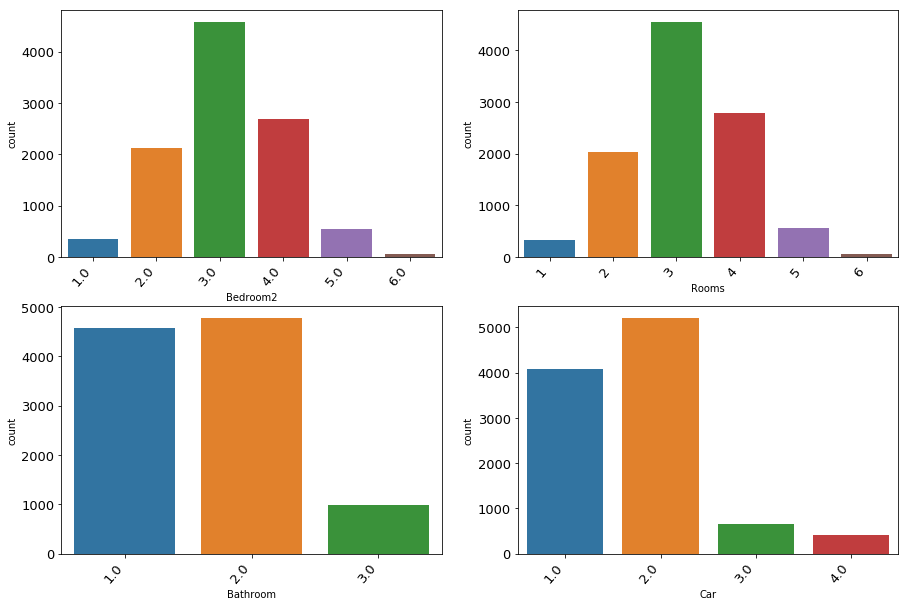

In [62]:
fig, ax =plt.subplots(2,2, figsize=(15,10))
sns.countplot(x='Bedroom2', data=df_data,ax=ax[0,0])
sns.countplot(x='Rooms', data=df_data,ax=ax[0,1])
sns.countplot(x='Bathroom', data=df_data,ax=ax[1,0])
sns.countplot(x='Car', data=df_data,ax=ax[1,1])
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=50, ha="right")
ax[0,0].tick_params(labelsize=13)
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=50, ha="right")
ax[0,1].tick_params(labelsize=13)
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=50, ha="right")
ax[1,0].tick_params(labelsize=13)
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=50, ha="right")
ax[1,1].tick_params(labelsize=13)

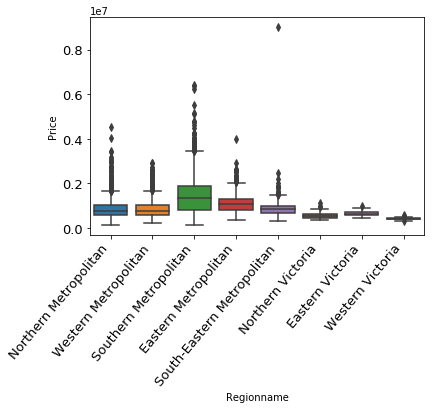

In [63]:
ax = sns.boxplot(x='Regionname', y='Price', data=df_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.tick_params(labelsize=13)

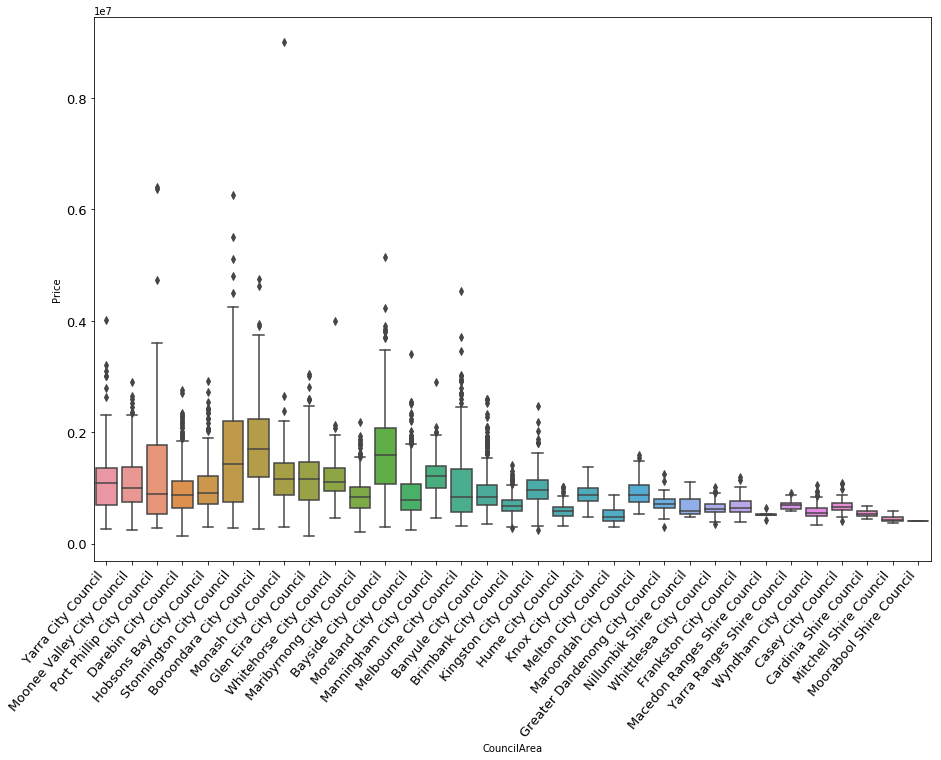

In [64]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x='CouncilArea', y='Price', data=df_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.tick_params(labelsize=13)

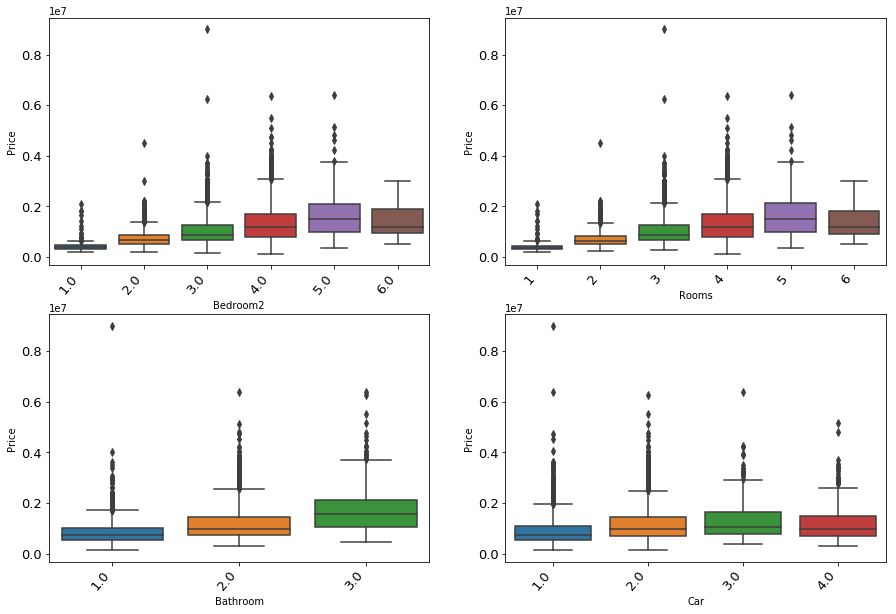

In [65]:
fig, ax =plt.subplots(2,2, figsize=(15,10))
sns.boxplot(x='Bedroom2', y='Price', data=df_data,ax=ax[0,0])
sns.boxplot(x='Rooms', y='Price', data=df_data,ax=ax[0,1])
sns.boxplot(x='Bathroom', y='Price', data=df_data,ax=ax[1,0])
sns.boxplot(x='Car', y='Price', data=df_data,ax=ax[1,1])
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=50, ha="right")
ax[0,0].tick_params(labelsize=13)
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=50, ha="right")
ax[0,1].tick_params(labelsize=13)
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=50, ha="right")
ax[1,0].tick_params(labelsize=13)
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=50, ha="right")
ax[1,1].tick_params(labelsize=13)

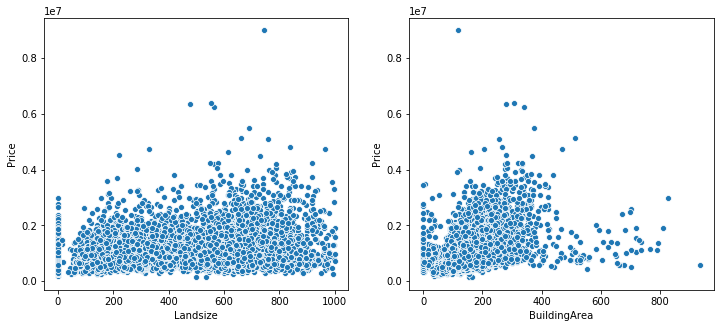

In [66]:
fig, ax =plt.subplots(1,2, figsize=(12,5))
sns.scatterplot(x='Landsize', y='Price', data=df_data,ax=ax[0])
sns.scatterplot(x='BuildingArea', y='Price', data=df_data,ax=ax[1])

In [67]:
df_d=df_data[['Postcode','Suburb','Price','Lattitude','Longtitude']]

In [68]:
df_d['Postcode']=df_d['Postcode'].apply(np.int64)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [70]:
l=df_d.Suburb.unique()
len(l)

307

In [71]:
df_d.Suburb.unique()

array(['Abbotsford', 'Airport West', 'Albert Park', 'Alphington',
       'Altona', 'Altona North', 'Armadale', 'Ascot Vale', 'Ashburton',
       'Ashwood', 'Avondale Heights', 'Balaclava', 'Balwyn',
       'Balwyn North', 'Bentleigh', 'Bentleigh East', 'Box Hill',
       'Braybrook', 'Brighton', 'Brighton East', 'Brunswick',
       'Brunswick West', 'Bulleen', 'Burwood', 'Camberwell', 'Canterbury',
       'Carlton North', 'Carnegie', 'Caulfield', 'Caulfield North',
       'Caulfield South', 'Chadstone', 'Clifton Hill', 'Coburg',
       'Coburg North', 'Collingwood', 'Doncaster', 'Eaglemont',
       'Elsternwick', 'Elwood', 'Essendon', 'Essendon North', 'Fairfield',
       'Fitzroy', 'Fitzroy North', 'Flemington', 'Footscray', 'Glen Iris',
       'Glenroy', 'Gowanbrae', 'Hadfield', 'Hampton', 'Hampton East',
       'Hawthorn', 'Heidelberg Heights', 'Heidelberg West', 'Hughesdale',
       'Ivanhoe', 'Kealba', 'Keilor East', 'Kensington', 'Kew',
       'Kew East', 'Kooyong', 'Maidstone', 

In [72]:
df_d1=df_d.groupby('Suburb').mean()

In [73]:
df_d1.head()

,Postcode,Price,Lattitude,Longtitude
Suburb,,,,
Abbotsford,3067,1.073117e+06,-37.803990,144.996601
Aberfeldie,3040,1.359462e+06,-37.759304,144.897928
Airport West,3042,7.402353e+05,-37.724090,144.879632
Albanvale,3021,5.403333e+05,-37.744537,144.768773
Albert Park,3206,2.257857e+06,-37.844672,144.952423


In [74]:
df_d1=df_d1.reset_index()

In [75]:
df_d1.head()

,Suburb,Postcode,Price,Lattitude,Longtitude
0,Abbotsford,3067,1.073117e+06,-37.803990,144.996601
1,Aberfeldie,3040,1.359462e+06,-37.759304,144.897928
2,Airport West,3042,7.402353e+05,-37.724090,144.879632
3,Albanvale,3021,5.403333e+05,-37.744537,144.768773
4,Albert Park,3206,2.257857e+06,-37.844672,144.952423


In [76]:
df_d1.isnull().sum()

Suburb        0
Postcode      0
Price         2
Lattitude     0
Longtitude    0
dtype: int64

In [77]:
df_d1.dropna(axis=0, inplace=True)

In [78]:
df_d1.isnull().sum()

Suburb        0
Postcode      0
Price         0
Lattitude     0
Longtitude    0
dtype: int64

In [79]:
df_d1.shape

(305, 5)

In [80]:
df_d1.head()

,Suburb,Postcode,Price,Lattitude,Longtitude
0,Abbotsford,3067,1.073117e+06,-37.803990,144.996601
1,Aberfeldie,3040,1.359462e+06,-37.759304,144.897928
2,Airport West,3042,7.402353e+05,-37.724090,144.879632
3,Albanvale,3021,5.403333e+05,-37.744537,144.768773
4,Albert Park,3206,2.257857e+06,-37.844672,144.952423


In [81]:
address = 'Melbourne'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Melbourne are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Melbourne are -37.8142176, 144.9631608.


In [83]:
# create map of Melbourne Suburbs using latitude and longitude values
map_melbourne = folium.Map(location=[latitude, longitude], zoom_start=9)

# add markers to map
for lat, lng, label in zip(df_d1['Lattitude'], df_d1['Longtitude'], df_d1['Suburb']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_melbourne)  
    
map_melbourne

## USING FOURSQUARE API

In [84]:
CLIENT_ID = '4YLP4DNGLBAR3NZHP1R5XSSA2QIH2SXWI1EZXFT1YBBPWSRM' # your Foursquare ID
CLIENT_SECRET = '0HFZ4VUJVPXR2XJA2GU2P4YNHXB2GMKZQIQHB5HECNOS5AO5' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4YLP4DNGLBAR3NZHP1R5XSSA2QIH2SXWI1EZXFT1YBBPWSRM
CLIENT_SECRET:0HFZ4VUJVPXR2XJA2GU2P4YNHXB2GMKZQIQHB5HECNOS5AO5


In [85]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Suburb', 
                  'Suburb Latitude', 
                  'Suburb Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [86]:
melbourne_venues = getNearbyVenues(names=df_d1['Suburb'],
                                   latitudes=df_d1['Lattitude'],
                                   longitudes=df_d1['Longtitude'],
                                   radius=2000, LIMIT=100)

In [88]:
melbourne_venues.head()

,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbotsford,-37.80399,144.996601,Three Bags Full,-37.807318,144.996603,Café
1,Abbotsford,-37.80399,144.996601,Stomping Ground Brewery & Beer Hall,-37.804683,144.991171,Brewery
2,Abbotsford,-37.80399,144.996601,Lentil As Anything,-37.802724,145.003507,Vegetarian / Vegan Restaurant
3,Abbotsford,-37.80399,144.996601,Au79,-37.808806,144.996035,Café
4,Abbotsford,-37.80399,144.996601,STREAT,-37.806428,144.990135,Café


In [90]:
print('{} venues are collected'.format(melbourne_venues.shape[0]))

14289 venues are collected


In [91]:
melbourne_venues.groupby('Suburb').count().head()

,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Suburb,,,,,,
Abbotsford,100,100,100,100,100,100
Aberfeldie,96,96,96,96,96,96
Airport West,56,56,56,56,56,56
Albanvale,12,12,12,12,12,12
Albert Park,100,100,100,100,100,100


In [92]:
df_mv=melbourne_venues.groupby('Suburb')

Let's find out how many unique categories can be curated from all the returned venues

In [93]:
print('There are {} uniques categories.'.format(len(melbourne_venues['Venue Category'].unique())))

There are 355 uniques categories.


## ANALYZING EACH SUBURB

In [100]:
# one hot encoding
melbourne_onehot = pd.get_dummies(melbourne_venues[['Venue Category']], prefix="", prefix_sep="")

# add suburb column back to dataframe
melbourne_onehot['Suburb'] = melbourne_venues['Suburb'] 

# move suburb column to the first column
fixed_columns = [melbourne_onehot.columns[-1]] + list(melbourne_onehot.columns[:-1])
melbourne_onehot = melbourne_onehot[fixed_columns]

melbourne_onehot.head()

,Suburb,Accessories Store,Afghan Restaurant,African Restaurant,Airport,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,...,Wine Bar,Wine Shop,Winery,Women's Store,Xinjiang Restaurant,Yemeni Restaurant,Yoga Studio,Yunnan Restaurant,Zoo,Zoo Exhibit
0,Abbotsford,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Abbotsford,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Abbotsford,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Abbotsford,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Abbotsford,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
melbourne_onehot.shape

(14289, 356)

Next, let's group rows by Suburb and by taking the mean of the frequency of occurrence of each category

In [147]:
melbourne_grouped = melbourne_onehot.groupby('Suburb').mean().reset_index()
melbourne_grouped.head()

,Suburb,Accessories Store,Afghan Restaurant,African Restaurant,Airport,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,...,Wine Bar,Wine Shop,Winery,Women's Store,Xinjiang Restaurant,Yemeni Restaurant,Yoga Studio,Yunnan Restaurant,Zoo,Zoo Exhibit
0,Abbotsford,0.0,0.0,0.01,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.02,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aberfeldie,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Airport West,0.0,0.0,0.00,0.017857,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Albanvale,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Albert Park,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
melbourne_grouped.shape

(305, 356)

In [149]:
num_top_venues = 5
for hood in melbourne_grouped['Suburb'][:3]:
    print("----"+hood+"----")
    temp =melbourne_grouped[melbourne_grouped['Suburb'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abbotsford----
                   venue  freq
0                   Café  0.16
1                    Pub  0.07
2                    Bar  0.05
3  Vietnamese Restaurant  0.05
4    Japanese Restaurant  0.04


----Aberfeldie----
                  venue  freq
0                  Café  0.19
1  Fast Food Restaurant  0.04
2         Shopping Mall  0.03
3     Electronics Store  0.03
4        Sandwich Place  0.03


----Airport West----
                   venue  freq
0                   Café  0.11
1            Supermarket  0.09
2  Portuguese Restaurant  0.05
3   Fast Food Restaurant  0.05
4          Shopping Mall  0.05




# First, let's write a function to sort the venues in descending order

In [150]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [213]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Suburb']
for idx in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(idx+1, indicators[idx]))
    except:
        columns.append('{}th Most Common Venue'.format(idx+1))

# create a new dataframe
suburb_venues_sorted = pd.DataFrame(columns=columns)
suburb_venues_sorted['Suburb'] = melbourne_grouped['Suburb']

for idx in np.arange(melbourne_grouped.shape[0]):
    suburb_venues_sorted.iloc[idx, 1:] = return_most_common_venues(melbourne_grouped.iloc[idx, :], num_top_venues)

In [214]:
suburb_venues_sorted.head()

,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbotsford,Café,Pub,Vietnamese Restaurant,Bar,Cocktail Bar,Japanese Restaurant,Pizza Place,Vegetarian / Vegan Restaurant,Coffee Shop,Thai Restaurant
1,Aberfeldie,Café,Fast Food Restaurant,Convenience Store,Coffee Shop,Burger Joint,Shopping Mall,Sandwich Place,Electronics Store,Park,Dessert Shop
2,Airport West,Café,Supermarket,Portuguese Restaurant,Fast Food Restaurant,Shopping Mall,Donut Shop,Sandwich Place,Italian Restaurant,Electronics Store,Gym / Fitness Center
3,Albanvale,Fast Food Restaurant,Supermarket,Discount Store,Gas Station,Big Box Store,Fish & Chips Shop,Portuguese Restaurant,Pet Store,Convenience Store,Dim Sum Restaurant
4,Albert Park,Café,Pub,Coffee Shop,Breakfast Spot,Japanese Restaurant,Italian Restaurant,Burger Joint,Beach,Bakery,Gastropub


## CLUSTERING SUBURBS

In [215]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

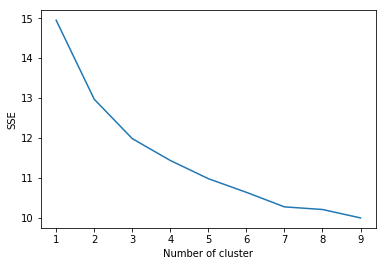

In [216]:
melbourne_grouped_clustering = melbourne_grouped.drop('Suburb', 1)
sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(melbourne_grouped_clustering)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [217]:
# set number of clusters
kclusters = 2

melbourne_grouped_clustering = melbourne_grouped.drop('Suburb', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(melbourne_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int32)

In [218]:
suburb_venues_sorted.head()

,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbotsford,Café,Pub,Vietnamese Restaurant,Bar,Cocktail Bar,Japanese Restaurant,Pizza Place,Vegetarian / Vegan Restaurant,Coffee Shop,Thai Restaurant
1,Aberfeldie,Café,Fast Food Restaurant,Convenience Store,Coffee Shop,Burger Joint,Shopping Mall,Sandwich Place,Electronics Store,Park,Dessert Shop
2,Airport West,Café,Supermarket,Portuguese Restaurant,Fast Food Restaurant,Shopping Mall,Donut Shop,Sandwich Place,Italian Restaurant,Electronics Store,Gym / Fitness Center
3,Albanvale,Fast Food Restaurant,Supermarket,Discount Store,Gas Station,Big Box Store,Fish & Chips Shop,Portuguese Restaurant,Pet Store,Convenience Store,Dim Sum Restaurant
4,Albert Park,Café,Pub,Coffee Shop,Breakfast Spot,Japanese Restaurant,Italian Restaurant,Burger Joint,Beach,Bakery,Gastropub


**Let's create a new dataframe that includes the cluster as well as the price and the top 10 venues for each suburb.

In [219]:
# add clustering labels
suburb_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
## new dataframe from existing dataframe
suburb_merged = df_d1[['Suburb','Postcode','Price','Lattitude','Longtitude']]
suburb_merged = suburb_merged.join(suburb_venues_sorted.set_index('Suburb'), on='Suburb')

In [220]:
suburb_merged.head()

,Suburb,Postcode,Price,Lattitude,Longtitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbotsford,3067,1.073117e+06,-37.803990,144.996601,1,Café,Pub,Vietnamese Restaurant,Bar,Cocktail Bar,Japanese Restaurant,Pizza Place,Vegetarian / Vegan Restaurant,Coffee Shop,Thai Restaurant
1,Aberfeldie,3040,1.359462e+06,-37.759304,144.897928,1,Café,Fast Food Restaurant,Convenience Store,Coffee Shop,Burger Joint,Shopping Mall,Sandwich Place,Electronics Store,Park,Dessert Shop
2,Airport West,3042,7.402353e+05,-37.724090,144.879632,0,Café,Supermarket,Portuguese Restaurant,Fast Food Restaurant,Shopping Mall,Donut Shop,Sandwich Place,Italian Restaurant,Electronics Store,Gym / Fitness Center
3,Albanvale,3021,5.403333e+05,-37.744537,144.768773,0,Fast Food Restaurant,Supermarket,Discount Store,Gas Station,Big Box Store,Fish & Chips Shop,Portuguese Restaurant,Pet Store,Convenience Store,Dim Sum Restaurant
4,Albert Park,3206,2.257857e+06,-37.844672,144.952423,1,Café,Pub,Coffee Shop,Breakfast Spot,Japanese Restaurant,Italian Restaurant,Burger Joint,Beach,Bakery,Gastropub


In [221]:
suburb_merged.shape

(305, 16)

In [222]:
suburb_merged['Cluster Labels'].value_counts()

0    160
1    145
Name: Cluster Labels, dtype: int64

In [223]:
suburb_merged=suburb_merged.set_index("Postcode",drop=True)

In [224]:
suburb_merged.head()

,Suburb,Price,Lattitude,Longtitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Postcode,,,,,,,,,,,,,,,
3067,Abbotsford,1.073117e+06,-37.803990,144.996601,1,Café,Pub,Vietnamese Restaurant,Bar,Cocktail Bar,Japanese Restaurant,Pizza Place,Vegetarian / Vegan Restaurant,Coffee Shop,Thai Restaurant
3040,Aberfeldie,1.359462e+06,-37.759304,144.897928,1,Café,Fast Food Restaurant,Convenience Store,Coffee Shop,Burger Joint,Shopping Mall,Sandwich Place,Electronics Store,Park,Dessert Shop
3042,Airport West,7.402353e+05,-37.724090,144.879632,0,Café,Supermarket,Portuguese Restaurant,Fast Food Restaurant,Shopping Mall,Donut Shop,Sandwich Place,Italian Restaurant,Electronics Store,Gym / Fitness Center
3021,Albanvale,5.403333e+05,-37.744537,144.768773,0,Fast Food Restaurant,Supermarket,Discount Store,Gas Station,Big Box Store,Fish & Chips Shop,Portuguese Restaurant,Pet Store,Convenience Store,Dim Sum Restaurant
3206,Albert Park,2.257857e+06,-37.844672,144.952423,1,Café,Pub,Coffee Shop,Breakfast Spot,Japanese Restaurant,Italian Restaurant,Burger Joint,Beach,Bakery,Gastropub


# Finally, let's visualize the resulting clusters

In [225]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set colors
rainbow = ['blue', 'red']

# add markers to the map
markers_colors = []
for lat, lon, nei, cluster in zip(suburb_merged['Lattitude'], suburb_merged['Longtitude'], suburb_merged['Suburb'], suburb_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

# Cluster 1

In [226]:
cluster1 = suburb_merged.loc[suburb_merged['Cluster Labels'] == 0, suburb_merged.columns[[0]+[1]+[3]+[4]+ list(range(5, suburb_merged.shape[1]))]]
cluster1.head()

,Suburb,Price,Longtitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Postcode,,,,,,,,,,,,,,
3042,Airport West,740235.313725,144.879632,0,Café,Supermarket,Portuguese Restaurant,Fast Food Restaurant,Shopping Mall,Donut Shop,Sandwich Place,Italian Restaurant,Electronics Store,Gym / Fitness Center
3021,Albanvale,540333.333333,144.768773,0,Fast Food Restaurant,Supermarket,Discount Store,Gas Station,Big Box Store,Fish & Chips Shop,Portuguese Restaurant,Pet Store,Convenience Store,Dim Sum Restaurant
3020,Albion,643272.727273,144.817539,0,Vietnamese Restaurant,Chinese Restaurant,Electronics Store,Pub,Fast Food Restaurant,Bakery,Pizza Place,Supermarket,Café,Skating Rink
3018,Altona,789331.428571,144.819965,0,Italian Restaurant,Lake,Gym,Burger Joint,Bar,Golf Course,Park,Pizza Place,Fish & Chips Shop,Soccer Field
3028,Altona Meadows,669416.666667,144.779827,0,Pizza Place,Café,Business Service,Fast Food Restaurant,Basketball Stadium,Fish & Chips Shop,Bakery,Sandwich Place,Plaza,Shopping Mall


In [227]:
cluster2 = suburb_merged.loc[suburb_merged['Cluster Labels'] == 1, suburb_merged.columns[[0]+[1]+[3]+[4]+ list(range(5, suburb_merged.shape[1]))]]
cluster2.head()

,Suburb,Price,Longtitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Postcode,,,,,,,,,,,,,,
3067,Abbotsford,1.073117e+06,144.996601,1,Café,Pub,Vietnamese Restaurant,Bar,Cocktail Bar,Japanese Restaurant,Pizza Place,Vegetarian / Vegan Restaurant,Coffee Shop,Thai Restaurant
3040,Aberfeldie,1.359462e+06,144.897928,1,Café,Fast Food Restaurant,Convenience Store,Coffee Shop,Burger Joint,Shopping Mall,Sandwich Place,Electronics Store,Park,Dessert Shop
3206,Albert Park,2.257857e+06,144.952423,1,Café,Pub,Coffee Shop,Breakfast Spot,Japanese Restaurant,Italian Restaurant,Burger Joint,Beach,Bakery,Gastropub
3078,Alphington,1.364529e+06,145.028761,1,Café,Pizza Place,Convenience Store,Train Station,Golf Course,Grocery Store,Japanese Restaurant,Fast Food Restaurant,Shoe Store,Sandwich Place
3022,Ardeer,6.380000e+05,144.801514,1,Train Station,Pub,Grocery Store,Liquor Store,Café,Shopping Mall,Racetrack,Food Service,Fish & Chips Shop,Farm


In [228]:
print('The mean price of cluster 0 (red) is AUD {}.'.format(int(cluster1.Price.mean())))
print('The mean price of cluster 1 (blue) is AUD {}.'.format(int(cluster2.Price.mean())))

The mean price of cluster 0 (red) is AUD 763919.
The mean price of cluster 1 (blue) is AUD 1190210.


In [231]:
new_suburb = suburb_merged.reset_index()

In [232]:
new_suburb.head()

,Postcode,Suburb,Price,Lattitude,Longtitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3067,Abbotsford,1.073117e+06,-37.803990,144.996601,1,Café,Pub,Vietnamese Restaurant,Bar,Cocktail Bar,Japanese Restaurant,Pizza Place,Vegetarian / Vegan Restaurant,Coffee Shop,Thai Restaurant
1,3040,Aberfeldie,1.359462e+06,-37.759304,144.897928,1,Café,Fast Food Restaurant,Convenience Store,Coffee Shop,Burger Joint,Shopping Mall,Sandwich Place,Electronics Store,Park,Dessert Shop
2,3042,Airport West,7.402353e+05,-37.724090,144.879632,0,Café,Supermarket,Portuguese Restaurant,Fast Food Restaurant,Shopping Mall,Donut Shop,Sandwich Place,Italian Restaurant,Electronics Store,Gym / Fitness Center
3,3021,Albanvale,5.403333e+05,-37.744537,144.768773,0,Fast Food Restaurant,Supermarket,Discount Store,Gas Station,Big Box Store,Fish & Chips Shop,Portuguese Restaurant,Pet Store,Convenience Store,Dim Sum Restaurant
4,3206,Albert Park,2.257857e+06,-37.844672,144.952423,1,Café,Pub,Coffee Shop,Breakfast Spot,Japanese Restaurant,Italian Restaurant,Burger Joint,Beach,Bakery,Gastropub


In [233]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup

In [234]:
Nei1=int(input("Enter the Postcode#1: "))

Enter the Postcode#1: 3168


In [276]:
Nei2=int(input("Enter the Postcode#2: "))

Enter the Postcode#2: 3910


In [277]:
df_price=new_suburb[['Postcode','Price','Cluster Labels']]

In [278]:
df_price.head()

,Postcode,Price,Cluster Labels
0,3067,1.073117e+06,1
1,3040,1.359462e+06,1
2,3042,7.402353e+05,0
3,3021,5.403333e+05,0
4,3206,2.257857e+06,1


In [279]:
df_price=df_price.groupby('Postcode').mean()


In [280]:
df_price.head()

,Price,Cluster Labels
Postcode,,
3000,6.841000e+05,0.0
3002,1.784167e+06,1.0
3003,9.704762e+05,1.0
3006,6.567045e+05,1.0
3008,8.000000e+05,1.0


In [281]:
df_suburb=new_suburb.groupby("Postcode").agg(lambda x:','.join(set(x)))

In [282]:
df_suburb.shape

(189, 11)

In [283]:
df_price.shape

(189, 2)

In [284]:
df_suburb.head()

,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Postcode,,,,,,,,,,,
3000,Melbourne,Bar,Cocktail Bar,Coffee Shop,Café,Korean Restaurant,Shopping Mall,Bookstore,Whisky Bar,Asian Restaurant,Cosmetics Shop
3002,East Melbourne,Café,Asian Restaurant,Park,Tennis Stadium,Bakery,Wine Bar,BBQ Joint,Bar,Japanese Restaurant,Australian Restaurant
3003,West Melbourne,Café,Coffee Shop,Korean Restaurant,Bar,Japanese Restaurant,Cocktail Bar,Burger Joint,Donut Shop,Shopping Mall,Playground
3006,Southbank,Café,Bar,Hotel,Park,Coffee Shop,Asian Restaurant,Cocktail Bar,Middle Eastern Restaurant,Italian Restaurant,Burger Joint
3008,Docklands,Café,Coffee Shop,Hotel,Japanese Restaurant,Cocktail Bar,Burger Joint,Park,Italian Restaurant,Seafood Restaurant,Bar


In [285]:
df_suburb=pd.merge(df_suburb,df_price,on='Postcode')

In [286]:
Venue_comparison=df_suburb.loc[[Nei1,Nei2]].T
Venue_comparison

Postcode,3168,3910
Suburb,"Clayton,Notting Hill",Langwarrin
1st Most Common Venue,Café,Shopping Mall
2nd Most Common Venue,"Furniture / Home Store,Sandwich Place",Bakery
3rd Most Common Venue,"Malay Restaurant,Asian Restaurant",Coffee Shop
4th Most Common Venue,"Shopping Mall,Indonesian Restaurant",Home Service
5th Most Common Venue,"Vietnamese Restaurant,Bakery",Gas Station
6th Most Common Venue,"Sandwich Place,Grocery Store",Art Gallery
7th Most Common Venue,"Portuguese Restaurant,Fast Food Restaurant",Fast Food Restaurant
8th Most Common Venue,"Supermarket,Korean Restaurant",Park
9th Most Common Venue,"Supermarket,Italian Restaurant",Pub


In [245]:
url1 = 'https://quickstats.censusdata.abs.gov.au/census_services/getproduct/census/2016/quickstat/POA{}?opendocument'.format(Nei1)
response1= requests.get(url1)

In [246]:
url2 = 'https://quickstats.censusdata.abs.gov.au/census_services/getproduct/census/2016/quickstat/POA{}?opendocument'.format(Nei2)
response2 = requests.get(url2)

In [247]:
response2

<Response [200]>

In [248]:
tables1= pd.read_html(url1)
tables2 = pd.read_html(url2)

In [249]:
people1=pd.DataFrame(tables1[0])
families1=pd.DataFrame(tables1[1])
dwellings1=pd.DataFrame(tables1[2])
people2=pd.DataFrame(tables2[0])
families2=pd.DataFrame(tables2[1])
dwellings2=pd.DataFrame(tables2[2])

In [250]:
dfaa1 = pd.concat([people1,families1,dwellings1],ignore_index=True,join="inner")
dfaa2 = pd.concat([people2,families2,dwellings2],ignore_index=True,join="inner")

In [251]:
dfaa1.columns=['Census Stats',Nei1]
dfaa2.columns=['Census Stats',Nei2]

In [252]:
dfaa2

,Census Stats,3174
0,People,38461
1,Male,50.2%
2,Female,49.8%
3,Median age,35
4,Families,9905
5,Average children per family,NaN
6,for families with children,1.8
7,for all families,0.8
8,All private dwellings,14797
9,Average people per household,2.7


In [253]:
dfaa=pd.merge(dfaa1,dfaa2,on='Census Stats')

In [254]:
dfaa.shape

(14, 3)

In [255]:
dfaa=dfaa.set_index("Census Stats",drop=True)

In [256]:
dfaa=dfaa.dropna(axis=0)

In [257]:
dfaa

,3168,3174
Census Stats,,
People,20197,38461
Male,50.4%,50.2%
Female,49.6%,49.8%
Median age,27,35
Families,3824,9905
for families with children,1.5,1.8
for all families,0.4,0.8
All private dwellings,8066,14797
Average people per household,2.7,2.7


In [273]:
mydf = pd.concat([Venue_comparison,dfaa],join="inner")

In [274]:
mydf.dropna(axis=0)

,3168,3174
Suburb,"Clayton,Notting Hill",Noble Park
1st Most Common Venue,Café,Fast Food Restaurant
2nd Most Common Venue,"Furniture / Home Store,Sandwich Place",Chinese Restaurant
3rd Most Common Venue,"Malay Restaurant,Asian Restaurant",Gym
4th Most Common Venue,"Shopping Mall,Indonesian Restaurant",Sandwich Place
5th Most Common Venue,"Vietnamese Restaurant,Bakery",Supermarket
6th Most Common Venue,"Sandwich Place,Grocery Store",Pizza Place
7th Most Common Venue,"Portuguese Restaurant,Fast Food Restaurant",Indian Restaurant
8th Most Common Venue,"Supermarket,Korean Restaurant",Vietnamese Restaurant
9th Most Common Venue,"Supermarket,Italian Restaurant",Seafood Restaurant


In [260]:
time.sleep(1)

In [261]:
housing_price_comparison=df_suburb.loc[[Nei1,Nei2],['Suburb','Price']]
housing_price_comparison=housing_price_comparison.set_index("Suburb",drop=True)
housing_price_comparison

,Price
Suburb,
"Clayton,Notting Hill",1.077442e+06
Noble Park,6.881667e+05


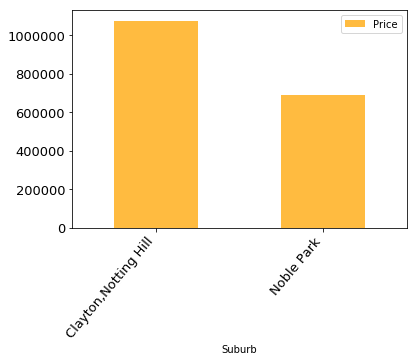

In [262]:
ax= housing_price_comparison.plot(kind='bar',alpha=0.75,color='orange');
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.tick_params(labelsize=13)